# McCall Search Model

Consider the job search model described in the lecture and in section 6.3 of Ljungqvist and Sargent. Recall that workers live forever, when unemployed the worker draws a wage each period from the distribution F(w), once a wage is accepted the jobs last forever, the worker receives unemployment benefit c
  when not employed, and has discount factor \beta. The value function for this problem satisfies the Bellman equation
  
  $$v(w)=\max\left\{ \frac{w}{1-\beta},c+\beta EV(w')\right\} $$
 

For the parameter values $\beta=0.9,c=2$, and the wage distribution given by

| $w_i$ | 1 | 2 | 3 | ... | 100 |
|--------|----|---|---|----|-----|
| Prob $W=w_i$| 0.01 | 0.01 | | | 0.01 |

write a julia program to solve the bellman equation by value function iteration.

Here is a way to proceed:

* Create 4 (100,1) zero vectors `V0,V1,w,p` as well as scalars `beta` and `c`.
* initiate `w` and `p` to contain the correct values.
* in a loop do something like

```julia
    for i in 1:maxIter
        EV = p*V0  # a scalar
        V1 = maximum(w.*(1/1-beta), c + beta*EV)   # not tested
        # if V1-V0 is small, stop
        
    end
```



In [3]:
beta = 0.9
c = 2.0
n = 100
p = Float64[1.0/n for i in 1:n]
w = linspace(1.0,n,n)
V0 = zeros(n)
V1 = zeros(n)
EV = 0.0
maxiter = 1000

for i in 1:maxiter
    EV = (p'*V0)[1]  # 1,1 array
    V1 = max(w.*(1/(1-beta)), c + beta*EV)  # pick first element of EV
    if maxabs(V1.-V0) < 1e-6
        println("solution found after $i iterations")
        break
    end
    V0 = V1
end


solution found after 35 iterations


* What is the reservation wage?

In [4]:
wbar = w[searchsortedlast(V1,c+beta*EV)]

63.0

* plot $c + beta*EV,V1$ against $w$


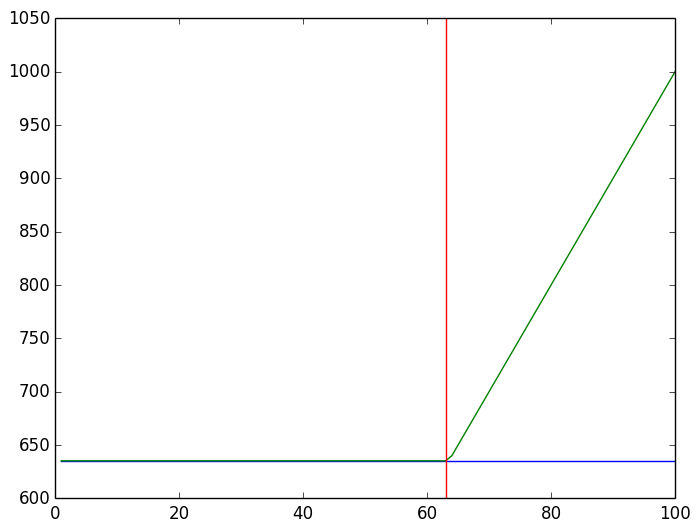

PyObject <matplotlib.lines.Line2D object at 0x3166ac390>

In [5]:
using PyPlot
plot(w,hcat([c + beta*EV for i=1:n],V1))
axvline(wbar,color="r")

* Redo this exercise for a different wage distribution with thin right tails: Assume that for $w_i
= {1,2,3,\dots,100}$, 

$$ \Pr(W=w_i) = \frac{w_i^{-1} }{\sum_{j=1}^100 w_j^{-1}} $$

* Plot both offer distributions.




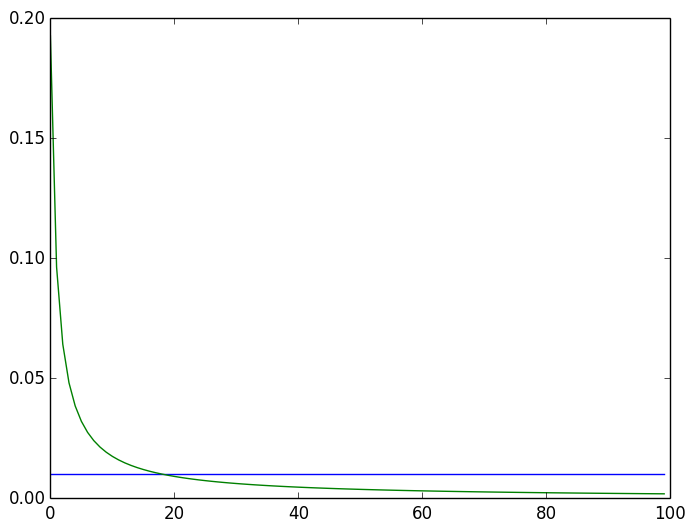

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x316ae6ed0>
 PyObject <matplotlib.lines.Line2D object at 0x316af4190>

In [6]:
p2 = 1./w
p2 = p2 ./ sum(p2)
plot(hcat(p,p2))

* how does the reservation wage differ?

solution found after 35 iterations


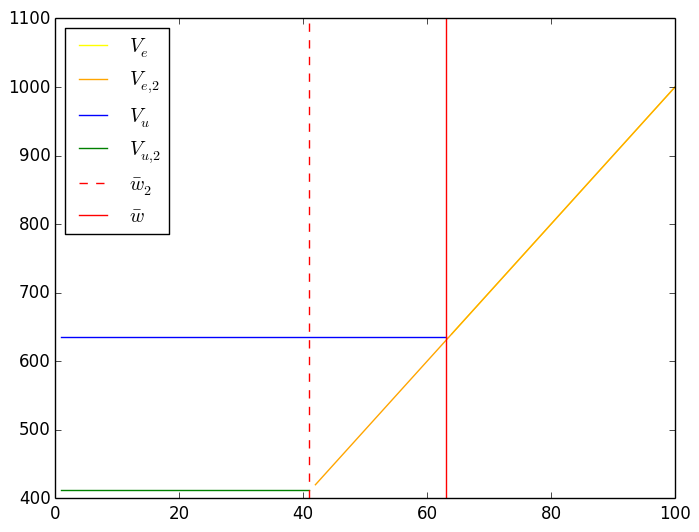

PyObject <matplotlib.legend.Legend object at 0x316d52fd0>

solution found after 64 iterations


In [7]:
function mccall(n,beta,c,p)
    w = linspace(1.0,n,n)
    V0 = zeros(n)
    V1 = zeros(n)
    EV = 0.0

    for i in 1:maxiter
        EV = (p'*V0)[1]  # 1,1 array
        V1 = max(w.*(1/(1-beta)), c + beta*EV)  # pick first element of EV
        if maxabs(V1.-V0) < 1e-6
            println("solution found after $i iterations")
            break
        end
        V0 = V1
    end
    wbar = w[searchsortedlast(V1,c+beta*EV)]
    mask = V1 .>  c + beta*EV
    
    return Dict("w"=>w,"V"=>V1,"EV"=>EV,"wbar"=>wbar,"mask"=>mask,"beta"=>beta)
end

model1 = mccall(100,beta,c,p);
model2 = mccall(100,beta,c,p2);

function plotModels(m1,m2)
    w = m1["w"]
    mask = m1["mask"]
    mask2 = m2["mask"]   
    plot(w[mask],m1["V"][mask],label=L"V_e",color="yellow")
    plot(w[mask2],m2["V"][mask2],label=L"V_{e,2}",color="orange")    
    plot(w[!mask],[c + beta*m1["EV"] for i=1:sum(!mask)],label=L"V_u",color="b")
    plot(w[!mask2],[c + beta*m2["EV"] for i=1:sum(!mask2)],label=L"V_{u,2}",color="g")   
    axvline(m2["wbar"],color="r",ls="--",label=L"\bar{w}_2")
    axvline(m1["wbar"],color="r",ls="-",label=L"\bar{w}")    
    legend(loc="upper left")
end

plotModels(model1,model2)


* What happens as you increase/decrease $c$ and $\beta$? In particular, what if $\beta\to0,\beta\to1$?

solution found after 5 iterations


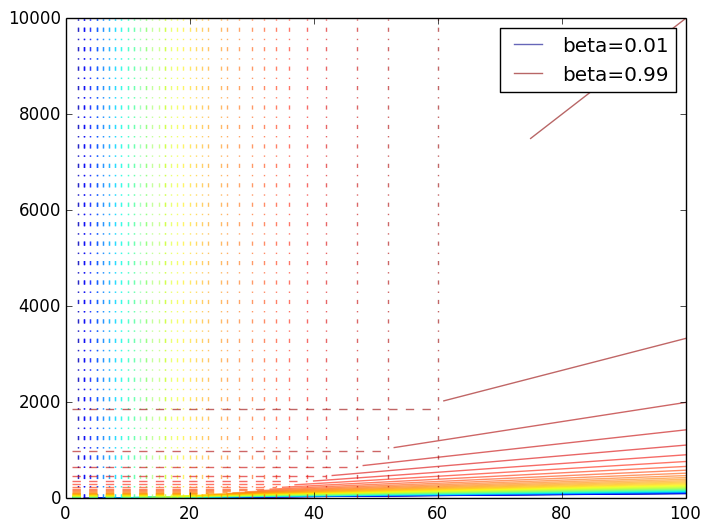

PyObject <matplotlib.legend.Legend object at 0x3188bf2d0>

solution found after 5 iterations
solution found after 6 iterations
solution found after 6 iterations
solution found after 7 iterations
solution found after 7 iterations
solution found after 7 iterations
solution found after 8 iterations
solution found after 8 iterations
solution found after 9 iterations
solution found after 9 iterations
solution found after 9 iterations
solution found after 10 iterations
solution found after 10 iterations
solution found after 11 iterations
solution found after 11 iterations
solution found after 11 iterations
solution found after 12 iterations
solution found after 12 iterations
solution found after 13 iterations
solution found after 13 iterations
solution found after 14 iterations
solution found after 15 iterations
solution found after 15 iterations
solution found after 16 iterations
solution found after 17 iterations
solution found after 17 iterations
solution found after 18 iterations
solution found after 19 iterations
solution found after 20 iterati

In [14]:
function plotModelList(mods)
    m = length(mods)
    jet = ColorMap("jet")[:__call__]
    fig, ax = subplots()
    v = mods[1]
    ax[:plot](w[v["mask"]],v["V"][v["mask"]],color=jet(0.01),alpha=0.6,label="beta=$(v["beta"])")
    v = mods[m]
    ax[:plot](w[v["mask"]],v["V"][v["mask"]],color=jet(0.99),alpha=0.6,label="beta=$(v["beta"])")

    for i=2:(m-1)
        v = mods[i]
        w = v["w"]
        mask = v["mask"] 
        ax[:plot](w[mask],v["V"][mask],color=jet(i/m),alpha=0.6)
        ax[:plot](w[!mask],[c + beta*v["EV"] for i=1:sum(!mask)],color=jet(i/m),alpha=0.6,ls="--")
        ax[:axvline](v["wbar"],color=jet(i/m),alpha=0.6,ls="-.")   
    end
    ax[:legend]()
end

mods = map(x->mccall(100,x,c,p2),linspace(0.01,0.99,50));

plotModelList(mods)